In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# Import Iris dataset

iris=datasets.load_iris()

In [7]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_scaled=scaler.fit_transform(data)

In [13]:
# Apply the PCA
from sklearn.decomposition import PCA

In [14]:
pca=PCA(n_components=2)

In [16]:
pca_scaled=pca.fit_transform(X_scaled)

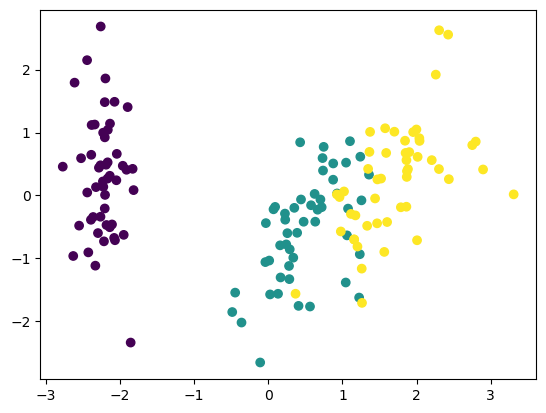

In [19]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

Text(0, 0.5, 'Euclidian Distance')

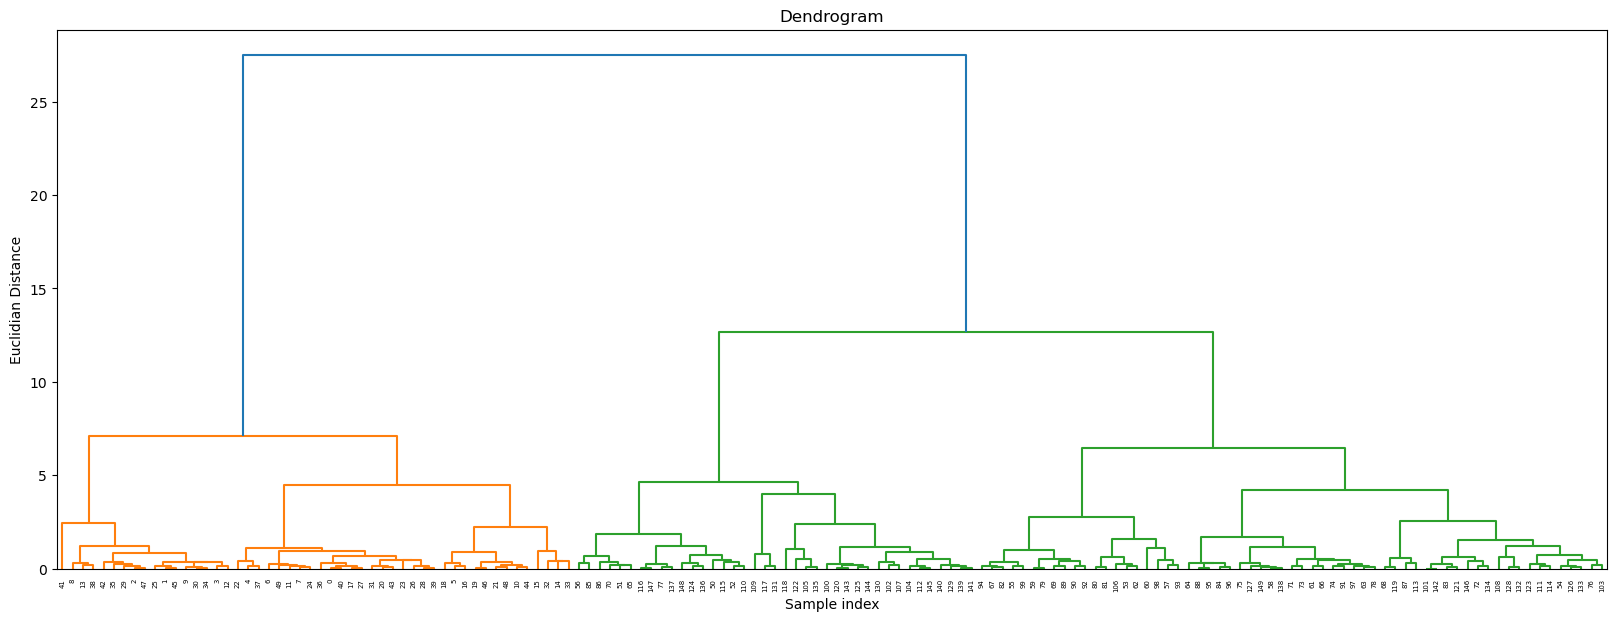

In [21]:
# Agglomerative Clustering
# Construct a dendrogram

import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))

sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidian Distance')

## Lignes verticaes plus longues pour les lignes bleues donc 2 clusters

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [28]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

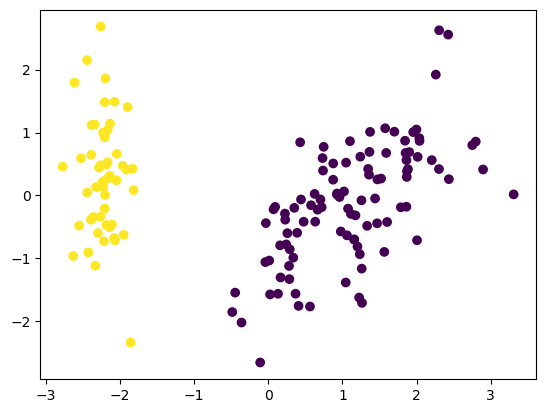

In [30]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)